In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df=pd.read_csv("../dataset/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
# Checking the shape of the dataset
df.shape

(1338, 7)

In [78]:
# Getting a summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
# Display the number of missing values in each column of the DataFrame
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [80]:
#checking duplicate values
df.duplicated().sum()

1

In [81]:
#Dropping duplicate values
df.drop_duplicates()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


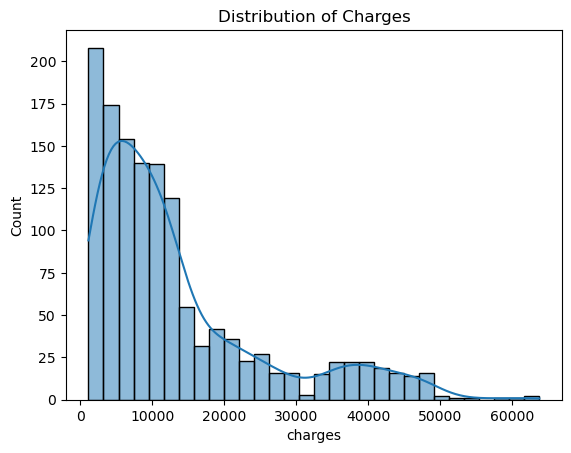

In [82]:
# Visualize the distribution of charges
sns.histplot(df["charges"],kde=True)
plt.title('Distribution of Charges')
plt.show()

<Axes: xlabel='region', ylabel='charges'>

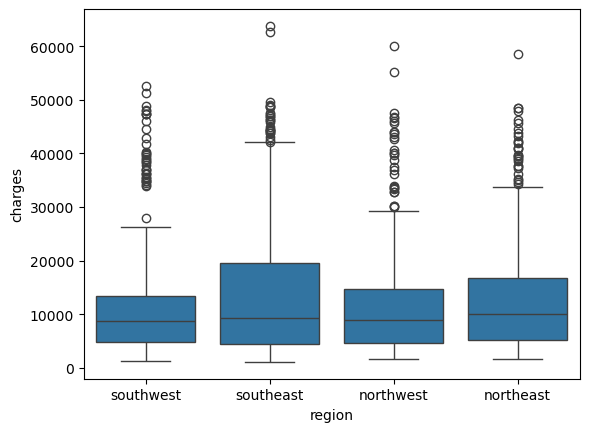

In [83]:
# Boxplot to check the distribution of charges across different regions
sns.boxplot(x='region',y='charges',data=df)

<Axes: xlabel='age', ylabel='charges'>

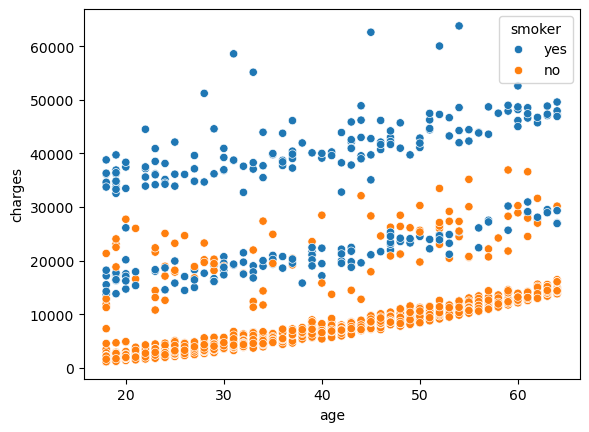

In [84]:
 #The relationship between `age` and `charges` while differentiating between smokers and non-smokers
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)

<Axes: xlabel='age', ylabel='charges'>

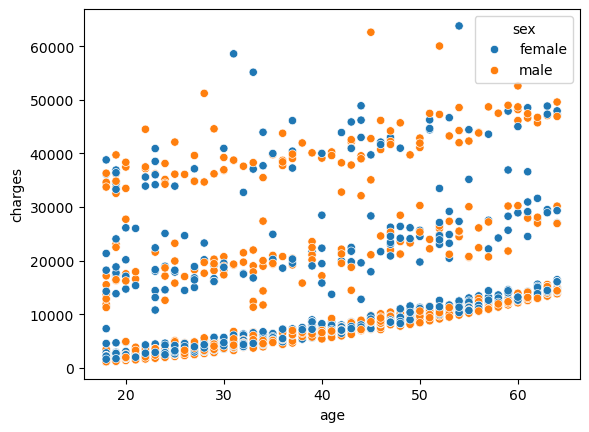

In [85]:
sns.scatterplot(x='age', y='charges', hue='sex', data=df)

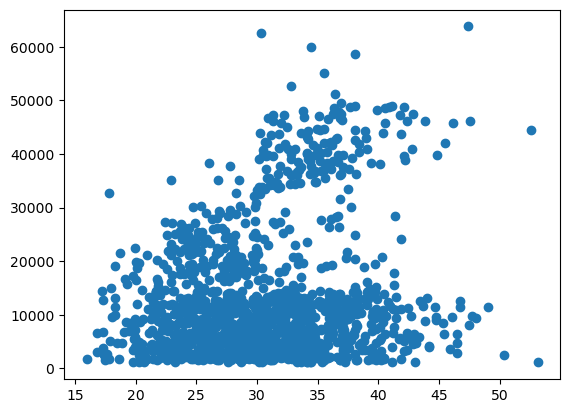

In [86]:
plt.scatter(df['bmi'],df['charges'])

In [87]:
# Import the LabelEncoder class from scikit-learn
from sklearn.preprocessing import LabelEncoder as le

In [88]:
# Fit the LabelEncoder on the categorical data and transform it into numerical values
sex_enc=le()
df['sex']=sex_enc.fit_transform(df['sex'])
smoker_enc=le()
df['smoker']=smoker_enc.fit_transform(df['smoker'])
region_enc=le()
df['region']=region_enc.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [89]:
# Import the StandardScaler class from scikit-learn
from sklearn.preprocessing import StandardScaler

In [90]:
# Fit the scaler on the data and transform it
charges_scaler=StandardScaler()
df['charges']=charges_scaler.fit_transform(df[['charges']])

In [91]:
# Compute the pairwise correlation of columns in the DataFrame
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


In [92]:
# Create a new DataFrame 'x' by keeping all columns except 'charges', which is the target variable
x=df.drop(['charges'],axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [93]:
# Extract the 'charge' column from the DataFrame into a new DataFrame
y=df[['charges']]
y.head()

,charges
0,0.298584
1,-0.953689
2,-0.728675
3,0.719843
4,-0.776802


In [94]:
# Import the train_test_split function from scikit-learn to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

In [95]:
# Split the dataset into training and testing sets with 30% of the data reserved for testing
# Set the random_state to 45 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=45)
# Display the shapes of the training and testing sets
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((936, 6), (402, 6), (936, 1), (402, 1))

In [96]:
# Import the LinearRegression class from scikit-learn to perform linear regression modeling
from sklearn.linear_model import LinearRegression

In [97]:
# Initialize a LinearRegression model instance
linear_model = LinearRegression()
linear_model

LinearRegression()

In [98]:
# Train the Linear Regression model using the training data
linear_model.fit(x_train,y_train)

LinearRegression()

In [99]:
# Import the r2_score function from scikit-learn to evaluate the performance of the regression model
from sklearn.metrics import r2_score

In [100]:
# Make predictions using the test data with the trained Linear Regression model
y_pred=linear_model.predict(x_test)
# Calculate the R^2 score to evaluate the performance of the model
r2=r2_score(y_test, y_pred) 
# Display the R^2 score
r2

0.7108458825049926

In [101]:
# Import the mean_squared_error function from scikit-learn to assess the model's performance
from sklearn.metrics import mean_squared_error

In [102]:
# Calculate the accuracy of the model based on the mean squared error
# Accuracy is computed as 1 minus the mean squared error
accuracy = 1 - mean_squared_error(y_test, y_pred)
# Convert accuracy to a percentage and display it
accuracy

0.7581665226168326

In [118]:
# Sample input data for testing
data = {
    'age': [45],  # Example age
    'sex': [1],  # Example sex (1 for male, 0 for female, depending on your encoding)
    'bmi': [28.5],  # Example BMI
    'children': [2],  # Example number of children
    'smoker': [1],  # Example smoker status (1 for smoker, 0 for non-smoker)
    'region': [2]}  # Example region (numeric encoding of region)

# Create DataFrame
df_sample = pd.DataFrame(data)

In [120]:
# Display the DataFrame
print("Sample Input DataFrame:")
print(df_sample)

Sample Input DataFrame:
   age  sex   bmi  children  smoker  region
0   45    1  28.5         2       1       2


In [122]:
output = linear_model.predict(df_sample)

In [124]:
print("Predicted Insurance Charges:", output[0])

Predicted Insurance Charges: [1.72204789]


In [127]:
# Inverse transform the scaled output to return the prediction to its original scale
output = charges_scaler.inverse_transform(output)
output

array([[34116.64709543]])